In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


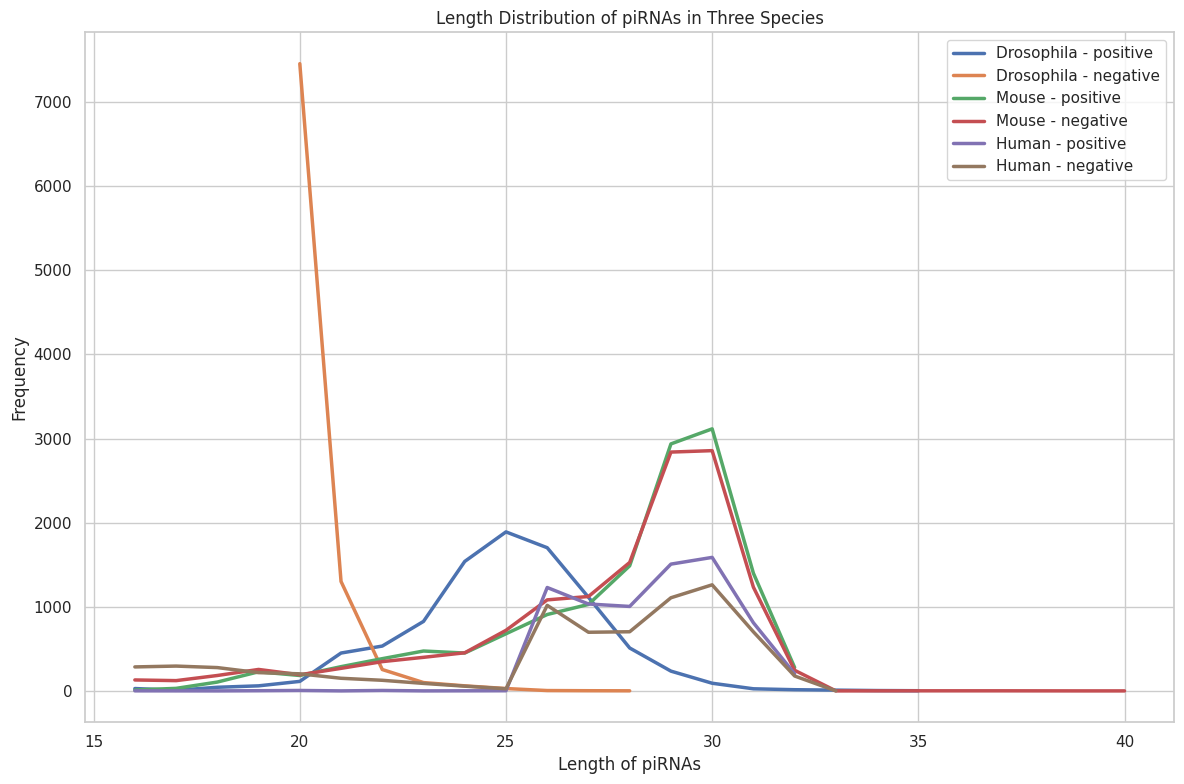

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths for positive and negative samples for each species
species_files = {
    "Drosophila": {
        "positive": "/content/drive/MyDrive/mansoor-work/dataset/drosophila_posi_samples.fasta",
        "negative": "/content/drive/MyDrive/mansoor-work/dataset/drosophila_nega_samples.fasta"
    },
    "Mouse": {
        "positive": "/content/drive/MyDrive/mansoor-work/dataset/mouse_posi_samples.fasta",
        "negative": "/content/drive/MyDrive/mansoor-work/dataset/mouse_nega_samples.fasta"
    },
    "Human": {
        "positive": "/content/drive/MyDrive/mansoor-work/dataset/human_posi_samples.fasta",
        "negative": "/content/drive/MyDrive/mansoor-work/dataset/human_nega_samples.fasta"
    }
}

# Function to read FASTA files and extract sequence lengths
def read_fasta_and_get_lengths(file_path):
    with open(file_path, "r") as file:
        sequences = file.readlines()
    sequence_lengths = [len(seq.strip()) for seq in sequences if not seq.startswith(">")]
    return sequence_lengths

# Calculate length distribution for each species and data type (positive/negative)
length_distributions = {}
for species, files in species_files.items():
    lengths = {
        "positive": read_fasta_and_get_lengths(files["positive"]),
        "negative": read_fasta_and_get_lengths(files["negative"])
    }
    length_distributions[species] = lengths

# Plot the length distribution for each species
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
for species, lengths in length_distributions.items():
    for data_type, data_lengths in lengths.items():
        length_counts = pd.Series(data_lengths).value_counts().sort_index()
        sns.lineplot(x=length_counts.index, y=length_counts.values, label=f"{species} - {data_type}", linewidth=2.5)
plt.xlabel('Length of piRNAs')
plt.ylabel('Frequency')
plt.title('Length Distribution of piRNAs in Three Species')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
